In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [115]:
df_linear = sns.load_dataset('titanic')

In [116]:
# simple linear regression
x = df_linear[['age']]
y = df_linear['fare']

In [117]:
df_linear.age.fillna(value = df_linear['age'].mean(), inplace =  True)

In [118]:
df_linear.isnull().sum() / len(x) *100
# y.isnull().sum() / len(y) *100  -- no null values

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [119]:
y.isnull().sum()

0

In [120]:
x.shape

(891, 1)

In [121]:
y.shape

(891,)

In [125]:
# how to select two columns
df_linear = df_linear[["age" , "fare"]]

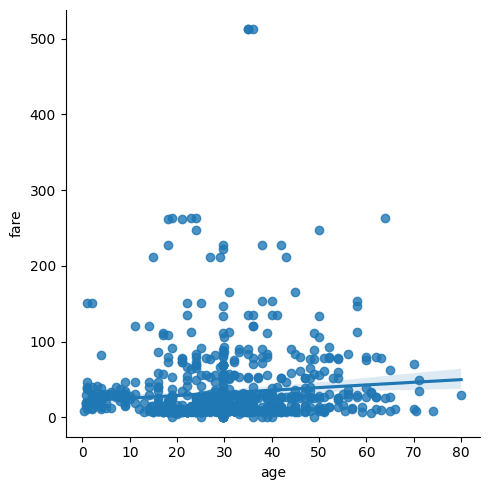

In [126]:
# plot - to check x and y
df = x
sns.lmplot(data = df_linear, x='age', y= 'fare')

<Axes: ylabel='age'>

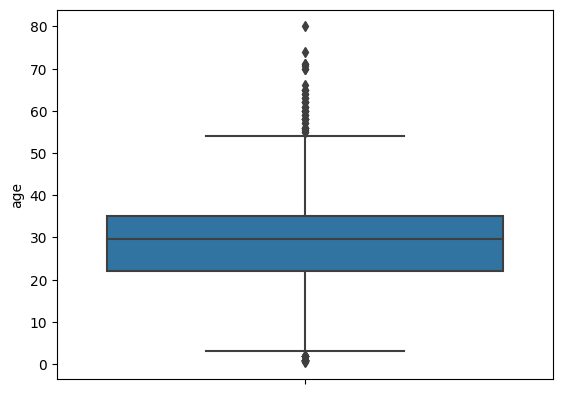

In [127]:
sns.boxplot(data = df_linear, y='age')

In [128]:
# removing outliers manually
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

<Axes: ylabel='fare'>

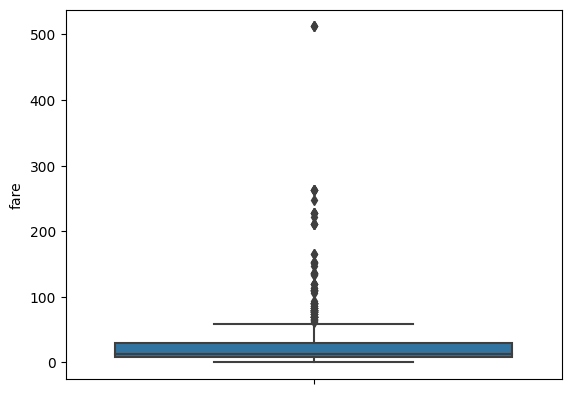

In [129]:
sns.boxplot(data = df_linear, y='fare')

In [130]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 40)]

In [131]:
x = df_linear[['age']] # always use double braces in x
y = df_linear['fare']

In [137]:
# now call your model
model = LinearRegression()
# train your model
model.fit(x,y)
# prediction
model.predict([[80]])

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.05317906])

<Axes: xlabel='fare'>

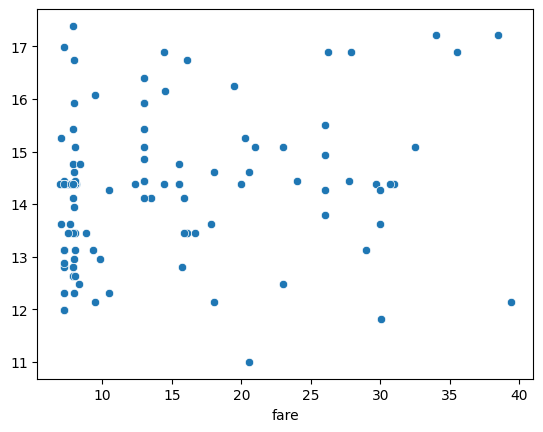

In [133]:
# model evaluation with matrics
# r2
# mean squared error
# Mean Absolute Error
# root nean square error

x_train, x_test , y_train , y_test = train_test_split(x,y, train_size=0.8)

# model 
model = LinearRegression()
model.fit(x_train, y_train)

# prediction 
predictions = model.predict(x_test)

sns.scatterplot(x =y_test, y =predictions)
 

In [134]:
model.score(x_test, y_test)  # not accurate best is 1.

0.037381650698579794

In [135]:
from sklearn.metrics import  mean_squared_error , mean_absolute_error, r2_score

mae = mean_absolute_error(y_true = y_test, y_pred = predictions)
mse = mean_squared_error(y_true = y_test, y_pred = predictions)
rmse = mean_squared_error(y_true = y_test, y_pred = predictions , squared =False)
R2 = r2_score(y_true = y_test, y_pred = predictions)

# print
print ("mae :", mae)
print ("mse :", mse)
print ("rmse :", rmse)
print ("R_squared :", R2)



mae : 6.778012676167167
mse : 67.37648439427566
rmse : 8.208318000313808
R_squared : 0.037381650698579794


In [136]:
# can also check rmse through numpy ..
import numpy as np
rmse = np.sqrt(mse)
rmse

8.208318000313808